
## Customer-Churn-Prediction

In [322]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries (we'll use later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score


## 1. Data Loading

We load the Telco Customer Churn dataset, which contains information about customer demographics, account details, services used, and churn status. This dataset will be the foundation for analysis and model building.


In [252]:
df=pd.read_csv('/Users/ankita/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [254]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Cleaning

Before building models, it is crucial to clean the data:
- Handle missing values
- Correct data types
- Remove duplicates if any
- Encode categorical variables


In [257]:
# Quick look at important columns
print(df['Churn'].value_counts())
print(df['TotalCharges'].head())


Churn
No     5174
Yes    1869
Name: count, dtype: int64
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object


In [261]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [263]:
# Final check
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
# Final check
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Exploratory Data Analysis (EDA)

In this section, we will:
- Understand the distribution of customers who churned vs stayed
- Analyze how different features impact churn (gender, senior citizen, contract type, internet service, etc.)
- Identify important patterns and relationships in the data


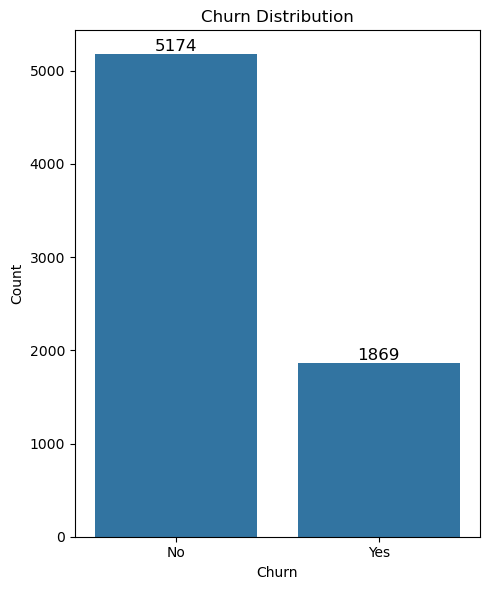

In [265]:
# Churn Count Plot
plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='Churn')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Convert height to int
                (p.get_x() + p.get_width() / 2., p.get_height()),  # x, y position
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

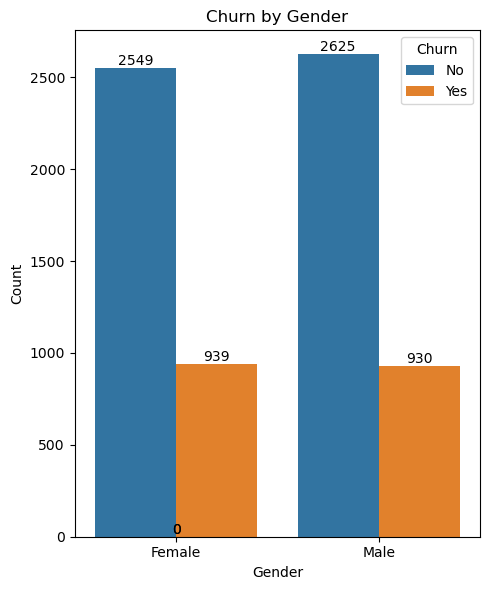

In [267]:
# Churn by Gender

plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='gender', hue='Churn')  # 🟰 Save the axis as ax

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


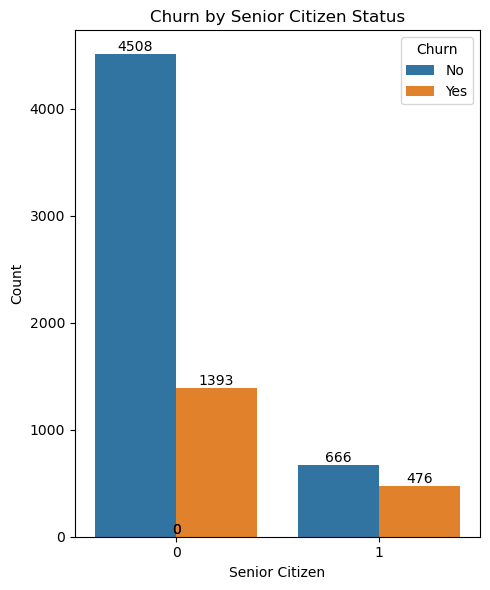

In [269]:
# Churn by Senior Citizen

plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='SeniorCitizen', hue='Churn')  

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



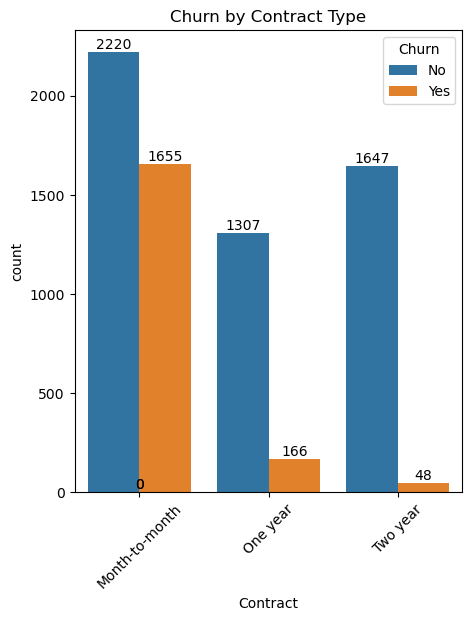

In [271]:
# Churn by Contract Type
plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='Contract', hue='Churn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()


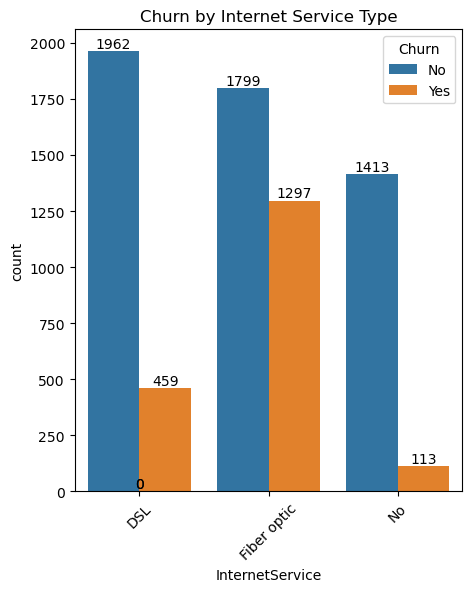

In [273]:
# Churn by Internet Service

plt.figure(figsize=(5,6))
ax = sns.countplot(data=df, x='InternetService', hue='Churn')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.title('Churn by Internet Service Type')
plt.xticks(rotation=45)
plt.show()


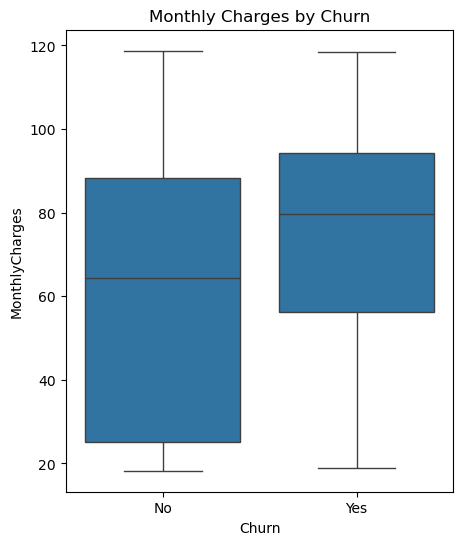

In [275]:
# Monthly Charges vs Churn
plt.figure(figsize=(5,6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()


In [277]:
from sklearn.preprocessing import LabelEncoder

# Initialize
le = LabelEncoder()

# Find categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Final Check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


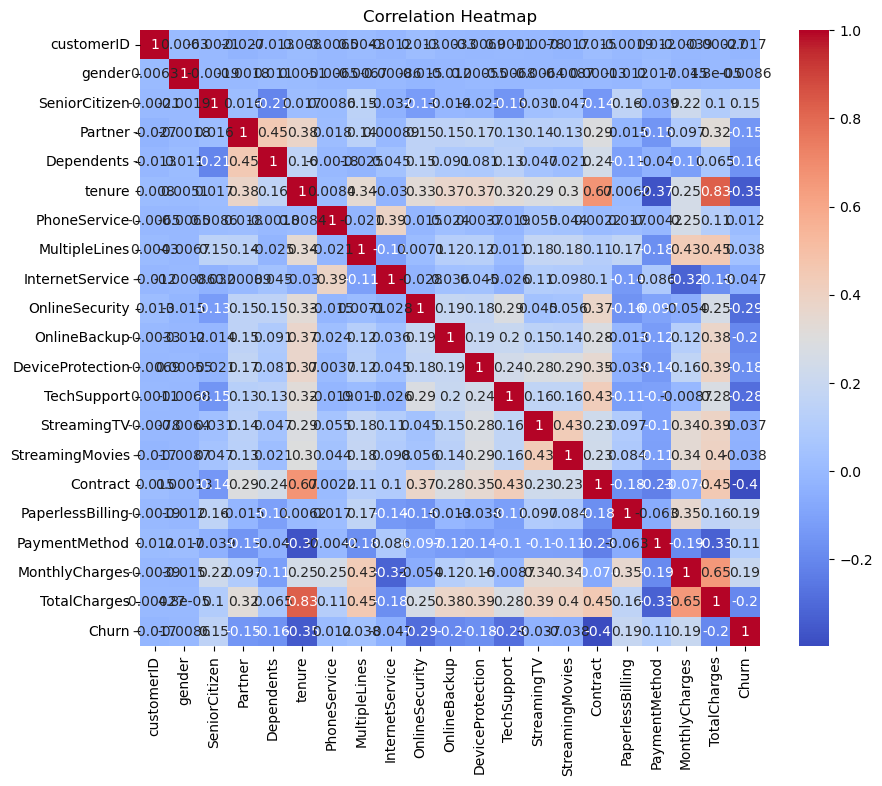

In [279]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Findings

We explored the dataset to understand patterns affecting churn:
- Customers with month-to-month contracts showed much higher churn rates.
- Senior citizens tend to churn more than younger customers.
- Customers with Fiber optic internet service have higher churn compared to DSL.
- Customers with higher MonthlyCharges are more likely to churn.
- Long-term contracts (1 year, 2 years) significantly reduce churn.



In [282]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

🧹 Preprocessing Plan

Handle missing values (especially "TotalCharges" column — it has some blanks).
Drop irrelevant columns (like "customerID").
Encode categorical features (Label Encoding / One-Hot Encoding).
Convert 'SeniorCitizen' to categorical (it's 0/1 but should be a category).
Feature scaling (for numerical features).


In [286]:
# Check where missing values are
df.isnull().sum()

# 'TotalCharges' looks like it has missing or blank entries — let's check
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check again
df.isnull().sum()

# Drop rows with missing TotalCharges
df = df.dropna()

In [290]:
# Drop customerID because it's not a useful feature
df.drop('customerID', axis=1, inplace=True)


In [292]:
# It's 0 or 1, but we want it to be a category
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})


In [294]:
# List of categorical features
cat_cols = df.select_dtypes(include=['object']).columns

# Label encode the binary categorical variables (Yes/No features)
for col in cat_cols:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# One-Hot Encode the remaining categorical variables (like 'InternetService', 'Contract', 'PaymentMethod')
df = pd.get_dummies(df, drop_first=True)


In [296]:
# Identify numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Scale numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [298]:
# Features (X) and Target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 5625
Testing samples: 1407


In [300]:
# Initialize the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict on Test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:,1]  # for ROC-AUC


Accuracy: 0.7932


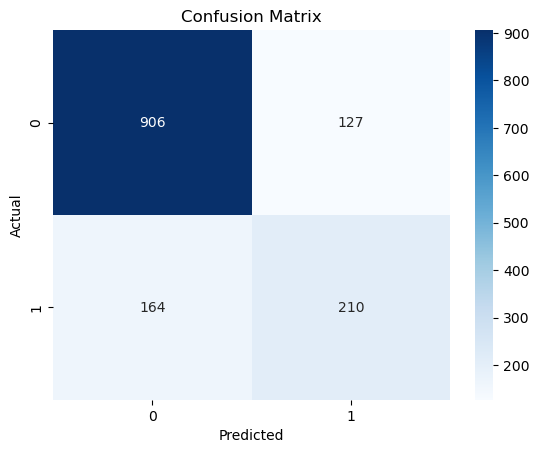

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407

ROC-AUC Score: 0.8345


In [302]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


In [310]:

!pip install xgboost
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00ta 0:00:01


In [312]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [314]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


In [316]:
# Empty lists to store results
model_names = []
accuracies = []
roc_aucs = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    model_names.append(name)
    accuracies.append(acc)
    roc_aucs.append(roc_auc)
    
    print(f"{name} - Accuracy: {acc:.4f}, ROC-AUC: {roc_auc:.4f}")


Random Forest - Accuracy: 0.7811, ROC-AUC: 0.8108
XGBoost - Accuracy: 0.7647, ROC-AUC: 0.8044
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
LightGBM - Accuracy: 0.7868, ROC-AUC: 0.8299


In [318]:
# Create a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC-AUC': roc_aucs
})

# Display
results_df.sort_values(by='ROC-AUC', ascending=False)


,Model,Accuracy,ROC-AUC
2,LightGBM,0.786780,0.829930
0,Random Forest,0.781095,0.810839
1,XGBoost,0.764748,0.804418


In [320]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # number of random combinations to try
    cv=3,  # cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # use all CPUs
)

# Fit on training data
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}
